In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import math
import numpy as np
from collections import Counter
from nltk.corpus import stopwords
import re
import operator


In [2]:
dataset = pd.read_table('train.tsv')
dataset = dataset.fillna(value=0, axis=1)

dataset.head()

,tags,description
0,licence-needed supervising-job 5-plus-years-ex...,THE COMPANY Employer is a midstream service...
1,2-4-years-experience-needed salary full-time-job,ICR Staffing is now accepting resumes for Indu...
2,part-time-job,This is a great position for the right person....
3,licence-needed,A large multi-specialty health center is expan...
4,5-plus-years-experience-needed full-time-job b...,JOB PURPOSE: The Account Director is respon...


In [3]:
# Extracting tags to gauge frequency of occurrence 
tagCounter = Counter()

for i in range(dataset.shape[0]):
    for word in str(dataset['tags'].iloc[i]).split(' '):
        tagCounter[word] += 1
    

tagCounter.pop('0', None)
tagCounter.most_common()

[('2-4-years-experience-needed', 1043),
 ('bs-degree-needed', 970),
 ('full-time-job', 885),
 ('supervising-job', 751),
 ('salary', 669),
 ('5-plus-years-experience-needed', 636),
 ('licence-needed', 524),
 ('hourly-wage', 451),
 ('1-year-experience-needed', 331),
 ('part-time-job', 328),
 ('associate-needed', 209),
 ('ms-or-phd-needed', 83)]

In [4]:
uniqueTags = []

for tag in tagCounter.keys():
    uniqueTags.append(tag)

uniqueTags



['2-4-years-experience-needed',
 'salary',
 'associate-needed',
 'licence-needed',
 'hourly-wage',
 'full-time-job',
 '1-year-experience-needed',
 'bs-degree-needed',
 'supervising-job',
 'part-time-job',
 'ms-or-phd-needed',
 '5-plus-years-experience-needed']

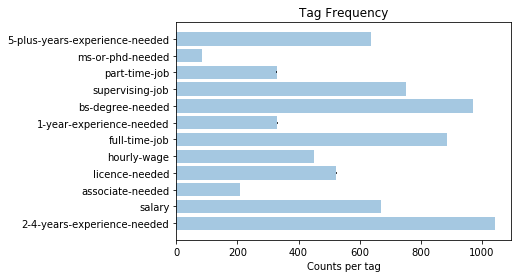

In [5]:
# Visualizing frequency of occurrence with some bar charts

keys = tagCounter.keys()
y_pos = np.arange(len(keys))
# get the counts for each key, assuming the values are numerical
tags = [tagCounter[k] for k in keys]
error = np.random.rand(len(keys))

plt.barh(y_pos, tags, xerr=error, align='center', alpha=0.4)
plt.yticks(y_pos, keys)
plt.xlabel('Counts per tag')
plt.title('Tag Frequency')

plt.show()

# Here's the plan:

1.  Separate tags into different columns (in progress)
2.  see what combinations of words have a high correlation with certain tags


In [6]:
# Separating the tags into list items within the dataframe
# Will use this to build common vocabulary between tag id's

dataset['tags'] = dataset['tags'].astype(str)

def rowSplitter(row):
    temp = [word for word in row.split(' ')]
    return temp

for i in range(dataset.shape[0]):
    dataset['tags'].iloc[i] = rowSplitter(dataset['tags'].iloc[i])
    


In [7]:
def vocabAggregator(tag):
    '''
    Takes: tag string of choice
    iterates through dataframe to find matches and populates Counter object 
    with cleaned vocab from all descriptions of associated job tag.
    Returns: Counter object / dictionary with vocab counts per tag
    
    '''
    filterList = ['', '•', '-', '*', '&', '·', '/', '–', '+']
    filterList = set(filterList)
    
    tempDict = Counter()
    
    for i in range(dataset.shape[0]):
        if tag in dataset['tags'].iloc[i]:
            for word in dataset['description'].iloc[i].lower().split(' '):
                if word not in stopwords.words('english') and word not in filterList:
                    tempDict[word] += 1
    
    return tempDict



In [8]:
# Testing aggregator on salary job tag and filtering results 
# to only show words that appear more than n times in the corpus
# of the associated job tag and sorting for readability 

salaryVocab = vocabAggregator('salary')
salaryVocab = {k:v for k,v in salaryVocab.items() if v > 200}

sorted_Vocab = sorted(salaryVocab.items(), key=operator.itemgetter(1), reverse=True)

sorted_Vocab



[('experience', 1230),
 ('sales', 885),
 ('work', 861),
 ('must', 646),
 ('skills', 604),
 ('ability', 582),
 ('business', 527),
 ('new', 514),
 ('position', 497),
 ('years', 483),
 ('salary', 458),
 ('team', 456),
 ('company', 449),
 ('management', 428),
 ('customer', 408),
 ('strong', 379),
 ('including', 368),
 ('service', 357),
 ('knowledge', 337),
 ('excellent', 325),
 ('looking', 319),
 ('job', 316),
 ('time', 313),
 ('benefits', 301),
 ('competitive', 287),
 ('communication', 287),
 ('please', 285),
 ('development', 280),
 ('working', 275),
 ('required', 274),
 ('support', 272),
 ('manager', 271),
 ('provide', 271),
 ('marketing', 269),
 ('services', 259),
 ('opportunity', 256),
 ('well', 255),
 ('able', 253),
 ('degree', 246),
 ('training', 238),
 ('responsible', 234),
 ('professional', 230),
 ('high', 226),
 ('office', 224),
 ('plus', 224),
 ('insurance', 220),
 ('quality', 219),
 ('health', 216),
 ('candidate', 216),
 ('within', 215),
 ('product', 213),
 ('great', 212),
 ('in

# Next Steps:

1.  Find out how to get the ratios of words for each tag, maybe look into log ratios from Trask
2.  Still need to split out the tags into separate columns and clean them for targeting
3.  Might need to work on word embeddings, but not sure if it applies quite yet
4.  Analyze the differences / overlap in vocab between tags

In [9]:
# Initializing columns for each of the potential tags 
# will iterate through the dataframe and turn this into a dummy matrix for targeting

dataset['1-year-experience-needed'] = 0
dataset['licence-needed'] = 0
dataset['supervising-job'] = 0
dataset['5-plus-years-experience-needed'] = 0
dataset['salary'] = 0
dataset['2-4-years-experience-needed'] = 0
dataset['ms-or-phd-needed'] = 0
dataset['associate-needed'] = 0
dataset['bs-degree-needed'] = 0
dataset['hourly-wage'] = 0
dataset['full-time-job'] = 0
dataset['part-time-job'] = 0
dataset['0'] = 0

dataset.head()

,tags,description,1-year-experience-needed,licence-needed,supervising-job,5-plus-years-experience-needed,salary,2-4-years-experience-needed,ms-or-phd-needed,associate-needed,bs-degree-needed,hourly-wage,full-time-job,part-time-job,0
0,"[licence-needed, supervising-job, 5-plus-years...",THE COMPANY Employer is a midstream service...,0,0,0,0,0,0,0,0,0,0,0,0,0
1,"[2-4-years-experience-needed, salary, full-tim...",ICR Staffing is now accepting resumes for Indu...,0,0,0,0,0,0,0,0,0,0,0,0,0
2,[part-time-job],This is a great position for the right person....,0,0,0,0,0,0,0,0,0,0,0,0,0
3,[licence-needed],A large multi-specialty health center is expan...,0,0,0,0,0,0,0,0,0,0,0,0,0
4,"[5-plus-years-experience-needed, full-time-job...",JOB PURPOSE: The Account Director is respon...,0,0,0,0,0,0,0,0,0,0,0,0,0


In [10]:
# Function to create dummy variables off of tag lists in dataFrame
def tagDummies(tags, row):
    for tag in tags:
        dataset[tag].iloc[row] = 1

        

In [13]:
for i in range(dataset.shape[0]):
    tagDummies(dataset['tags'].iloc[i], i)

dataset.head(20)


/Users/Marklar/Desktop/codez/anaconda/envs/dl/lib/python3.5/site-packages/pandas/core/indexing.py:141: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


,tags,description,1-year-experience-needed,licence-needed,supervising-job,5-plus-years-experience-needed,salary,2-4-years-experience-needed,ms-or-phd-needed,associate-needed,bs-degree-needed,hourly-wage,full-time-job,part-time-job,0
0,"[licence-needed, supervising-job, 5-plus-years...",THE COMPANY Employer is a midstream service...,0,1,1,1,0,0,0,0,0,0,0,0,0
1,"[2-4-years-experience-needed, salary, full-tim...",ICR Staffing is now accepting resumes for Indu...,0,0,0,0,1,1,0,0,0,0,1,0,0
2,[part-time-job],This is a great position for the right person....,0,0,0,0,0,0,0,0,0,0,0,1,0
3,[licence-needed],A large multi-specialty health center is expan...,0,1,0,0,0,0,0,0,0,0,0,0,0
4,"[5-plus-years-experience-needed, full-time-job...",JOB PURPOSE: The Account Director is respon...,0,0,1,1,0,0,0,0,1,0,1,0,0
5,"[associate-needed, 5-plus-years-experience-nee...","At Cottage Health System, our facilities are s...",0,0,0,1,0,0,0,1,0,0,0,0,0
6,"[full-time-job, ms-or-phd-needed, 5-plus-years...",*E Learning Instructional Designer with at lea...,0,0,0,1,0,0,1,0,0,0,1,0,0
7,"[bs-degree-needed, 5-plus-years-experience-nee...",Sales and Service Representative SAF-Hollan...,0,0,0,1,0,0,0,0,1,0,0,0,0
8,"[bs-degree-needed, 2-4-years-experience-needed]","SAF-Holland, Inc. is currently seeking an Inte...",0,0,0,0,0,1,0,0,1,0,0,0,0
9,"[full-time-job, hourly-wage]",Immediate opening for full time staffing coord...,0,0,0,0,0,0,0,0,0,1,1,0,0


In [15]:
# Writing this to CSV since it took a long time to parse
# dataset.to_csv('dummyTagged.csv', encoding='utf-8')


In [19]:
dummyTagged = pd.read_csv('dummyTagged.csv')
dummyTagged = dummyTagged.drop('Unnamed: 0', 1)
dummyTagged = dummyTagged.drop('tags', 1)

dummyTagged.head()

,description,1-year-experience-needed,licence-needed,supervising-job,5-plus-years-experience-needed,salary,2-4-years-experience-needed,ms-or-phd-needed,associate-needed,bs-degree-needed,hourly-wage,full-time-job,part-time-job,0
0,THE COMPANY Employer is a midstream service...,0,1,1,1,0,0,0,0,0,0,0,0,0
1,ICR Staffing is now accepting resumes for Indu...,0,0,0,0,1,1,0,0,0,0,1,0,0
2,This is a great position for the right person....,0,0,0,0,0,0,0,0,0,0,0,1,0
3,A large multi-specialty health center is expan...,0,1,0,0,0,0,0,0,0,0,0,0,0
4,JOB PURPOSE: The Account Director is respon...,0,0,1,1,0,0,0,0,1,0,1,0,0


# Next Steps:
1.  It's looking more and more like I'm going to need to figure out a strategy for embedding the description column
2.  Once the embeddings are taken care of, I should be able to pass the embeddings to a neural network using the dummy columns as targets
3.  To my understanding, the embeddings will be 'learned' over epochs 

# Relevant Research Notes:
1.  http://scikit-learn.org/stable/modules/multiclass.html
2.  http://scikit-learn.org/stable/modules/tree.html#tree-multioutput
3.  http://scikit-learn.org/stable/auto_examples/plot_multilabel.html#sphx-glr-auto-examples-plot-multilabel-py

In multilabel learning, the joint set of binary classification tasks is expressed with label binary indicator array: each sample is one row of a 2d array of shape (n_samples, n_classes) with binary values: the one, i.e. the non zero elements, corresponds to the subset of labels. 

An array such as np.array([[1, 0, 0], [0, 1, 1], [0, 0, 0]]) represents label 0 in the first sample, labels 1 and 2 in the second sample, and no labels in the third sample. Producing multilabel data as a list of sets of labels may be more intuitive. The MultiLabelBinarizer transformer can be used to convert between a collection of collections of labels and the indicator format.

A multi-output problem is a supervised learning problem with several outputs to predict, that is when Y is a 2d array of size [n_samples, n_outputs]. When there is no correlation between the outputs, a very simple way to solve this kind of problem is to build n independent models, i.e. one for each output, and then to use those models to independently predict each one of the n outputs. However, because it is likely that the output values related to the same input are themselves correlated, an often better way is to build a single model capable of predicting simultaneously all n outputs. First, it requires lower training time since only a single estimator is built. Second, the generalization accuracy of the resulting estimator may often be increased.

With regard to decision trees, this strategy can readily be used to support multi-output problems. This requires the following changes:

1.  Store n output values in leaves, instead of 1
2.  Use splitting criteria that compute the average reduction across all n outputs.

This module offers support for multi-output problems by implementing this strategy in both DecisionTreeClassifier and DecisionTreeRegressor. If a decision tree is fit on an output array Y of size [n_samples, n_outputs] then the resulting estimator will:

1.  Output n_output values upon predict;
2.  Output a list of n_output arrays of class probabilities upon predict_proba.

In [2]:
from sklearn.preprocessing import MultiLabelBinarizer

y = [[2, 3, 4], [2], [0, 1, 3], [0, 1, 2, 3, 4], [0, 1, 2]]

MultiLabelBinarizer().fit_transform(y)


array([[0, 0, 1, 1, 1],
       [0, 0, 1, 0, 0],
       [1, 1, 0, 1, 0],
       [1, 1, 1, 1, 1],
       [1, 1, 1, 0, 0]])